## Linear Regression Optimization Workflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression

## Pick your Slope and intercept!

In [2]:
# Define the slope of the relationship
number_of_points = 100

# pick any number between -10 and 10
slope = 7
intercept = 4

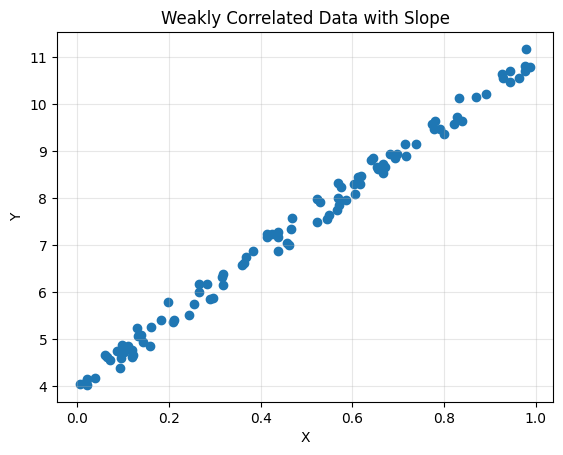

In [3]:
# Set a random seed for reproducibility
np.random.seed(0)

# Generate random x values
X = np.random.rand(number_of_points)

# Generate random noise for y values
noise = np.random.normal(0, 0.175, 100)

# Calculate y values with weak correlation to x
y = slope * X + noise + intercept

# Plot the data with a light grid
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Weakly Correlated Data with Slope')

# Add a light grid
plt.grid(alpha=0.3)

plt.show()

In [6]:
X_test = X.reshape(-1,1)
y_test = y.reshape(-1,1)

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ],
       [0.64589411],
       [0.43758721],
       [0.891773  ],
       [0.96366276],
       [0.38344152],
       [0.79172504],
       [0.52889492],
       [0.56804456],
       [0.92559664],
       [0.07103606],
       [0.0871293 ],
       [0.0202184 ],
       [0.83261985],
       [0.77815675],
       [0.87001215],
       [0.97861834],
       [0.79915856],
       [0.46147936],
       [0.78052918],
       [0.11827443],
       [0.63992102],
       [0.14335329],
       [0.94466892],
       [0.52184832],
       [0.41466194],
       [0.26455561],
       [0.77423369],
       [0.45615033],
       [0.56843395],
       [0.0187898 ],
       [0.6176355 ],
       [0.61209572],
       [0.616934  ],
       [0.94374808],
       [0.6818203 ],
       [0.3595079 ],
       [0.43703195],
       [0.6976312 ],
       [0.06022547],
       [0.66676672],
       [0.67063787],
       [0.21038256],
       [0.128

## Define the Parameter Grid

In [7]:
# Define the parameter grid
number_of_values = 200

slope_values = np.linspace(-10, 10, number_of_values)  # Generate some number of slope values between -10 and 10
intercept_values = np.linspace(-10, 10, number_of_values)  # Generate some number of intercept values between -10 and 10

In [8]:
# Perform grid search
best_score = -np.inf
best_slope = None
best_intercept = None
results = []

## Loops through every possible combination of slopes and intercepts, trying to
## fit them with our loosely correlated model - we want to get close to 7 and 4
for slope in slope_values:
    for intercept in intercept_values:
        model = LinearRegression()
        model.fit(X_test, slope * X_test + intercept)
        ## I think I get it?? -> .fit will take our random x inputs, and try to fit them to the (very) linear possible model we create with each set of coefficients and intercepts -> should find the slope and intercept we put in, but it's stored in object form so it lerts us easily move into scoring
        score = model.score(X_test, y_test) ## now scores our model using the X_test inputs against the y_test (our actual outputs)
        results.append({'Slope': slope, 'Intercept': intercept, 'Score': score})
        if score > best_score:
            best_score = score
            best_slope = slope
            best_intercept = intercept

# Print the best parameters and score rounded to 4 decimal places
print("Best slope:", round(best_slope, 4))
print("Best intercept:", round(best_intercept, 4))
print("Best score:", round(best_score, 4)) # Score of 1 is best

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

Best slope: 6.9849
Best intercept: 4.0704
Best score: 0.9924


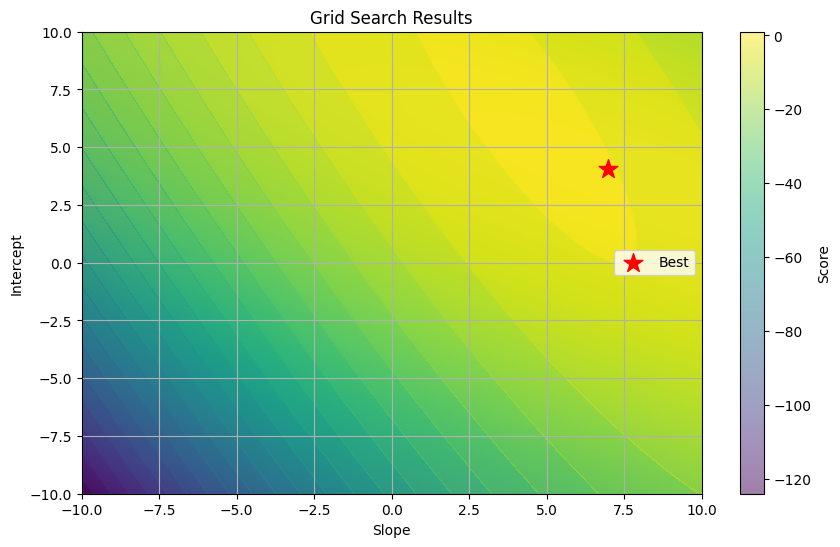

In [12]:
# Plot scatter with contour
plt.figure(figsize=(10, 6))
plt.scatter(results_df.Slope,
            results_df.Intercept,
            c=results_df.Score,
            alpha=0.5,
            cmap='viridis')

plt.colorbar(label='Score')
plt.contourf(slope_values, intercept_values, results_df.Score.values.reshape(number_of_values, number_of_values), levels=20, alpha=0.5, cmap='viridis')

plt.scatter(best_slope, best_intercept, marker='*', color='red', s=200, label='Best')

plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Grid Search Results')
plt.legend()
plt.grid(True)
plt.show()

## Random Search

In [40]:
# Define the parameter grid
number_of_values_rnd = 40
# Generate 40 random slope values between -10 and 10
slope_values_rnd = np.random.uniform(-10, 10, number_of_values_rnd)

# Generate 40 random intercept values between -10 and 10
intercept_values_rnd = np.random.uniform(-10, 10, number_of_values_rnd)

In [41]:
%%time

# Perform grid search
best_score_rnd = -np.inf  # Initialize to negative infinity
best_slope_rnd = None
best_intercept_rnd = None
results = []

for slope in slope_values_rnd:
    for intercept in intercept_values_rnd:
        model = LinearRegression()
        model.fit(X_test, slope * X_test + intercept)
        score = model.score(X_test, y_test)
        results.append({'Slope': slope, 'Intercept': intercept, 'Score': score})
        if score > best_score_rnd:
            best_score_rnd = score  # Update the best score
            best_slope_rnd = slope
            best_intercept_rnd = intercept

# Print the best parameters and score rounded to 4 decimal places
print("Best slope:", round(best_slope_rnd, 4))
print("Best intercept:", round(best_intercept_rnd, 4))
print("Best score:", round(best_score_rnd, 4))


# Convert results to a DataFrame
results_df_rnd = pd.DataFrame(results)

Best slope: 7.6953
Best intercept: 3.5579
Best score: 0.9771
CPU times: user 575 ms, sys: 15.4 ms, total: 591 ms
Wall time: 585 ms


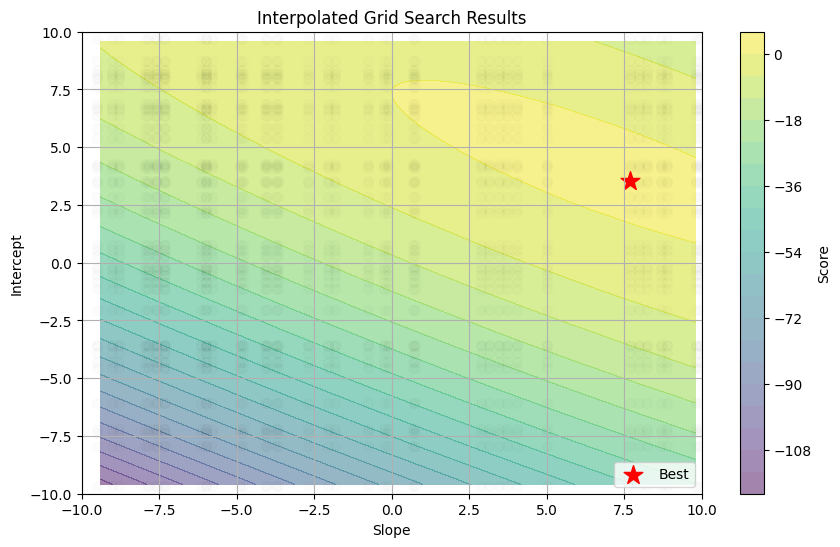

In [42]:
# Assume results_df_rnd is already created and contains 'Slope', 'Intercept', and 'Score'

# Define grid over which to interpolate
# Grid dimensions should cover the range of your random slopes and intercepts
grid_x, grid_y = np.mgrid[-10:10:100j, -10:10:100j]  # 100j specifies 100 points from -10 to 10

# Interpolate unstructured D-dimensional data.
points = results_df_rnd[['Slope', 'Intercept']].values  # Points from the dataframe
values = results_df_rnd['Score'].values  # Corresponding scores
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

# Plotting
plt.figure(figsize=(10, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis', alpha=0.5)
plt.colorbar(contour, label='Score')

# Scatter plot of the actual data points
plt.scatter(results_df_rnd['Slope'], results_df_rnd['Intercept'], c='black', s=50, alpha=0.01)

# Highlight the best parameters
plt.scatter(best_slope_rnd, best_intercept_rnd, color='red', marker='*', s=200, label='Best')

plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Interpolated Grid Search Results')
plt.legend()
plt.grid(True)
plt.show()



Best Slope (from grid): 6.896896896896898
Best Intercept (from grid): 4.074074074074074
Best Score (from grid): 1.001052774715006


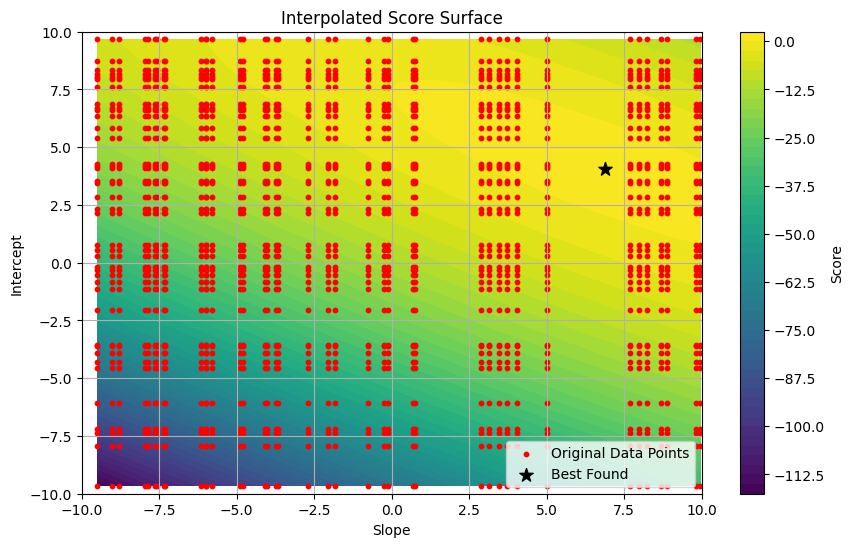

CPU times: user 1.32 s, sys: 163 ms, total: 1.49 s
Wall time: 985 ms


In [44]:
%%time

# Define the range for your grid (should cover the full range of your random variables)
x_min, x_max = -10, 10
y_min, y_max = -10, 10
grid_size = 1000  # Defines the resolution of the grid

# Generate a regular grid to interpolate onto
grid_x, grid_y = np.mgrid[x_min:x_max:complex(0, grid_size), y_min:y_max:complex(0, grid_size)]

# Perform the interpolation
points = results_df_rnd[['Slope', 'Intercept']].values
values = results_df_rnd['Score'].values
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic', fill_value=np.nan)

# Find the indices of the maximum score in the interpolated grid
max_idx = np.nanargmax(grid_z)
max_position = np.unravel_index(max_idx, grid_z.shape)

# Extract the best slope and intercept from the grid positions
best_slope_from_grid = grid_x[max_position]
best_intercept_from_grid = grid_y[max_position]
best_score_from_grid = grid_z[max_position]

# Output the results
print("Best Slope (from grid):", best_slope_from_grid)
print("Best Intercept (from grid):", best_intercept_from_grid)
print("Best Score (from grid):", best_score_from_grid)

# Optionally, plot the results
plt.figure(figsize=(10, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Score')
plt.scatter(points[:, 0], points[:, 1], color='red', s=10, label='Original Data Points')
plt.scatter(best_slope_from_grid, best_intercept_from_grid, color='black', s=100, marker='*', label='Best Found')
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.title('Interpolated Score Surface')
plt.legend()
plt.grid(True)
plt.show()